# **Tracking Penguin in Antarctica**


> Modified September 2024

## Overview

In this exercise you will extract satellite data in polar stereographic projection (defined by xgrid and ygrid) around a set of points defined by longitude, latitude, and time coordinates, like that produced by an animal telemetry tag, and ship track, or a glider tract.

### The exercise demonstrates the following techniques:

* Loading data from a tab- or comma-separated file
* Plotting the latitude/longitude points onto a map 
* Extracting satellite data along a track
* Plotting the satellite data onto a map  

### Datasets used:
**Sea ice concentration satellite data**  

This data product has daily and monthly Climate Data Record (CDR) of sea ice concentration data processed by NOAA/NSIDC team for the Arctic in 25km resolution from 1978 to the most recent annual processing. The sea ice concentration data are derived from microwave remote sensing data.  As the CDR data has availability latency due to quality control and data processing, [Near real time data are also avaiable for the most current date](https://polarwatch.noaa.gov/catalog/ice-sq-sh-nsidc-cdr-v4/preview).

For this tutorial, the monthly sea ice concentration data are used.  To preview and download the CDR data, please visit [NOAA PolarWatch CDR Data](https://polarwatch.noaa.gov/catalog/ice-sq-sh-nsidc-cdr-v4/preview/?).



**Adelie penguin telemetry track** 

Adelie penguin (_Pygoscelis adeliae_) telemetry data were collected by Argos satellites in the Southern Ocean from October 29, 1996 to February 19, 2013, as part of the U.S. Antarctic Marine Living Resources project. Additionally, a turtle raised in captivity in Japan, was tagged and released on May 04, 2005 in the Central Pacific. The tag transmitted for over three years and the turtle traveled as far as the southern tip of Baja California.  The track dataset is stored in the data/ folder of this module.  For more information about the project and for download the dataset, please visit [NOAA NCEI webpage](https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.nodc:0244399).

For this tutorial the data were subsampled to reduce the data points from over 1200 to 25. 


 

## Import the required Python modules

## Packages

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cftime # CDF time format conversion

import netCDF4 as nc
import xarray as xr
import cartopy.crs as ccrs # cartopy: geospatial data visualization
import cartopy.feature as cfeature
import pyproj
import warnings
warnings.filterwarnings("ignore")

## **Sea Ice Concentration Data**
Note: Monthly Sea Ice Concentration Data from October 1996 to April 2013.

Link: https://polarwatch.noaa.gov/erddap/griddap/nsidcG02202v4shmday.html

In [7]:
ds = xr.open_dataset("https://polarwatch.noaa.gov/erddap/griddap/nsidcG02202v4sh1day")
sic = ds['cdr_seaice_conc_monthly'] 

In [9]:
ds

<xarray.Dataset> Size: 1GB
Dimensions:                           (time: 545, ygrid: 332, xgrid: 316)
Coordinates:
  * time                              (time) datetime64[ns] 4kB 1978-11-01 .....
  * ygrid                             (ygrid) float32 1kB 4.338e+06 ... -3.93...
  * xgrid                             (xgrid) float32 1kB -3.938e+06 ... 3.93...
Data variables:
    cdr_seaice_conc_monthly           (time, ygrid, xgrid) float32 229MB ...
    nsidc_bt_seaice_conc_monthly      (time, ygrid, xgrid) float32 229MB ...
    nsidc_nt_seaice_conc_monthly      (time, ygrid, xgrid) float32 229MB ...
    qa_of_cdr_seaice_conc_monthly     (time, ygrid, xgrid) float32 229MB ...
    stdev_of_cdr_seaice_conc_monthly  (time, ygrid, xgrid) float32 229MB ...
Attributes: (12/66)
    _NCProperties:                                       version=2,netcdf=4.8...
    acknowledgement:                                     This project was sup...
    cdm_data_type:                                       Grid
    cdr_variable:                                        cdr_seaice_conc_monthly
    contributor_name:                                    Walter N. Meier, Flo...
    contributor_role:                                    principal investigat...
    ...                                                  ...
    summary:                                             This data set provid...
    time_coverage_duration:                              P1M
    time_coverage_end:                                   2024-03-01T00:00:00Z
    time_coverage_resolution:                            P1M
    time_coverage_start:                                 1978-11-01T00:00:00Z
    title:                                               Sea Ice Concentratio...

### Visualize the sea ice concentration values

The metadata describes the valid range of the data to be between 0 and 1 as the sea ice concentration is a fraction.  
However, there are values greater than 1, specifically 2.5 in the histogram.  Going back to the metadata, the value greater than 1
represents flag for specific 

In [3]:
sic = ds['cdr_seaice_conc_monthly']
sic = sic.where(sic <=1, np.nan)

sic_vals = sic[0].values.flatten()
sic_vals = sic_vals[~np.isnan(sic_vals)]
# keep values less than equal to 1, otherwise, nan



Text(0.5, 1.0, 'Histogram of sea ice concentration value from timestep=0')

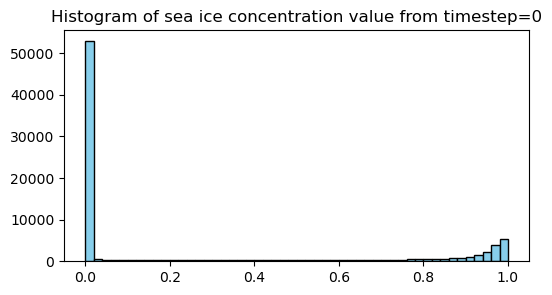

In [4]:
plt.figure(figsize=(6, 3))
plt.hist(sic_vals, bins=50, color='skyblue', edgecolor='black')
plt.title("Histogram of sea ice concentration value from timestep=0")


## Mapping

In [5]:
# From attribute: +proj=stere +lat_0=-90 +lat_ts=-70 +lon_0=0 +k=1 +x_0=0 +y_0=0 +a=6378273 +b=6356889.449 +units=m +no_defs
# class cartopy.crs.SouthPolarStereo(central_longitude=0.0, true_scale_latitude=-70)

polar_crs = ccrs.SouthPolarStereo(central_longitude=0.0, true_scale_latitude=-70)

# set figure size
plt.figure(figsize=(5,5))
# set the map projection and associated boundaries
ax = plt.axes(projection = crs_epsg)
ax.set_extent([-3950000.0, 3950000.0, -3950000.0, 4350000.0], crs_epsg) # Valid Range: xgrid [-3950000.0, 3950000.0] & ygrid [-3950000.0, 4350000.0]
ax.coastlines()
ax.add_feature(cfeature.LAND)

# set the data crs using 'transform'
# set the data crs as described in the netcdf metadata
cs = ax.pcolormesh(ds['xgrid'], ds['ygrid'], sic[0],
                   cmap=plt.cm.Blues,  transform= crs_epsg) #transform default is basemap specs
plt.colorbar(cs, ax=ax, location='right', shrink =0.8)
ax.set_title('Ice Concentration of timestep 1')

NameError: name 'crs_epsg' is not defined

<Figure size 500x500 with 0 Axes>

### Load penguin telemetry data in csv 

In [12]:
path = 'data/copa_adpe_ncei.csv'
penguin = pd.read_csv(path)
penguin.head()

,BirdId,Sex,Age,Breed Stage,DateGMT,TimeGMT,Latitude,Longitude,ArgosQuality
0,ADPE1,female,adult,incubation,28/10/1997,7:54:00,-62.171667,-58.445000,2
1,ADPE1,female,adult,incubation,28/10/1997,9:32:00,-62.173333,-58.463333,2
2,ADPE1,female,adult,incubation,28/10/1997,18:15:00,-62.158333,-58.426667,1
3,ADPE1,female,adult,incubation,28/10/1997,19:57:00,-62.175000,-58.441667,2
4,ADPE1,female,adult,incubation,28/10/1997,21:37:00,-62.171667,-58.445000,2


### Exploratory Data Analysis (EDA) of the penguin telemetry data

In [13]:
# Understand dates

penguin['DateGMT'] = pd.to_datetime(penguin['DateGMT'], format='%d/%m/%Y')
penguin['Year_Month'] = penguin['DateGMT'].dt.strftime('%Y-%m')
unique_year_month = penguin['Year_Month'].unique()
np.sort(unique_year_month)

print(f"Years: {np.sort(penguin['DateGMT'].dt.year.unique())}")
print(f"Date Range: {penguin['DateGMT'].min()}, {penguin['DateGMT'].max()}")
print(f"Unique months:\n{np.sort(unique_year_month)}")

Years: [1996 1997 2002 2003 2004 2005 2006 2007 2009 2010 2011 2012 2013]
Date Range: 1996-10-29 00:00:00, 2013-02-19 00:00:00
Unique months:
['1996-10' '1996-11' '1997-10' '1997-11' '1997-12' '2002-01' '2002-02'
 '2002-03' '2003-01' '2003-02' '2003-03' '2004-01' '2004-02' '2004-03'
 '2004-04' '2004-05' '2004-06' '2004-07' '2004-08' '2004-12' '2005-01'
 '2005-02' '2006-01' '2007-01' '2009-02' '2009-03' '2010-01' '2010-10'
 '2010-11' '2011-12' '2012-01' '2012-02' '2012-12' '2013-01' '2013-02']


#### Distribution

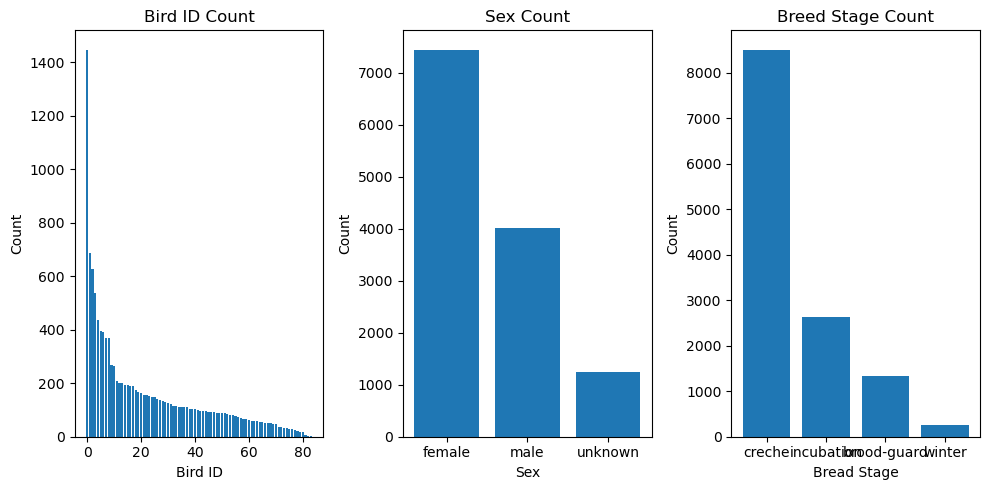

In [89]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

axs[0].bar(range(len(penguin['BirdId'].value_counts())), penguin['BirdId'].value_counts())
axs[0].set_title('Bird ID Count')
axs[0].set_xlabel('Bird ID')
axs[0].set_ylabel('Count')

axs[1].bar(penguin['Sex'].value_counts().index, penguin['Sex'].value_counts())
axs[1].set_title('Sex Count')
axs[1].set_xlabel('Sex')
axs[1].set_ylabel('Count')

axs[2].bar(penguin['Breed Stage'].value_counts().index, penguin['Breed Stage'].value_counts())
axs[2].set_title('Breed Stage Count')
axs[2].set_xlabel('Bread Stage')
axs[2].set_ylabel('Count')

plt.tight_layout()

plt.show()

### Map the penguin locations

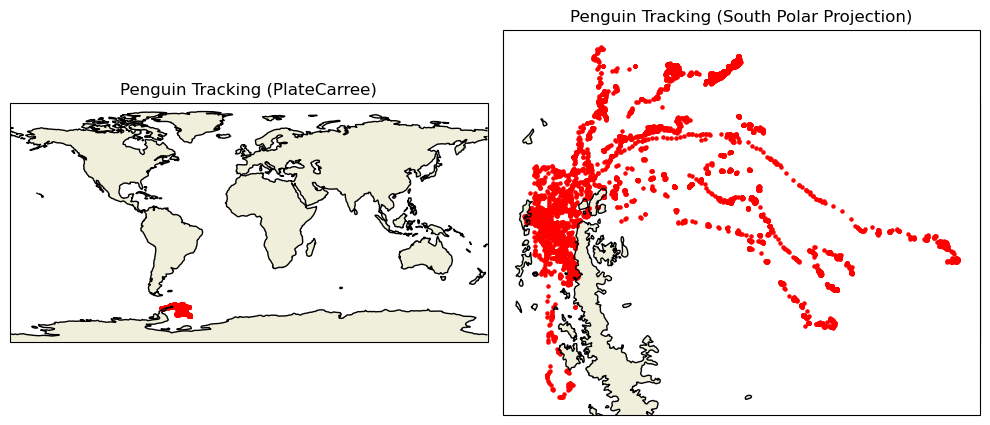

In [122]:


# Create a figure with 2 subplots side by side: one for PlateCarree and one for Polar projection
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[10, 5], subplot_kw={'projection': ccrs.PlateCarree()})

# PlateCarree projection (left side)
ax1.coastlines()
ax1.set_global()
ax1.add_feature(cfeature.LAND)

# Scatter penguin locations on PlateCarree projection
ax1.scatter(
    x=penguin["Longitude"],
    y=penguin["Latitude"],
    color="red",
    s=5,
    alpha=1,
    transform=ccrs.PlateCarree()
)
ax1.set_title('Penguin Tracking (PlateCarree)')

# Polar projection (right side) with South Polar Stereographic projection
ax2 = plt.subplot(1, 2, 2, projection=polar_crs)  # Correctly setting polar projection
ax2.coastlines()
ax2.add_feature(cfeature.LAND)

# Scatter penguin locations on South Polar projection
ax2.scatter(
    x=penguin["Longitude"],
    y=penguin["Latitude"],
    color="red",
    s=5,
    alpha=1,
    transform=ccrs.PlateCarree()
)
ax2.set_title('Penguin Tracking (South Polar Projection)')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


### Adding penguin locations to the projected sea ice map

As an exercise to add the penguin locations to the projected map, we will use 

Text(0.5, 1.0, 'Ice Concentration of timestep 1')

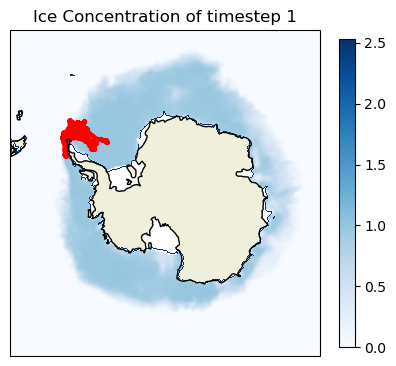

In [18]:
polar_crs = ccrs.SouthPolarStereo(central_longitude=0.0, true_scale_latitude=-70)

# set figure size
plt.figure(figsize=(5,5))
# set the map projection and associated boundaries
ax = plt.axes(projection = polar_crs)
ax.set_extent([-3950000.0, 3950000.0, -3950000.0, 4350000.0], polar_crs) # Valid Range: xgrid [-3950000.0, 3950000.0] & ygrid [-3950000.0, 4350000.0]
ax.coastlines()
ax.add_feature(cfeature.LAND)

# set the data crs using 'transform'
# set the data crs as described in the netcdf metadata
cs = ax.pcolormesh(ds['xgrid'], ds['ygrid'], sic[0],
                   cmap=plt.cm.Blues,  transform= polar_crs) #transform default is basemap specs
plt.colorbar(cs, ax=ax, location='right', shrink =0.8)

# Add the penguin tracks to the map
scatter = plt.scatter(
    y=penguin["Latitude"],
    x=penguin["Longitude"],
    color="red",
    s=3,
    alpha=1,
    transform=ccrs.PlateCarree()
)

ax.set_title('Ice Concentration of timestep 1')



### Matchup Penguin and Sea ice concentration data

We will select one penguin with the most locations and will match up penguin data with satellite data based on the location and date.

### Penguin with the most locations

Penguins
ADPE24 Female
ADPE29 Male
ADPE29 Unknown


#

In [14]:
# Select penguin with the most count
penguin_counts = penguin['BirdId'].value_counts().head(10) 

for id, count in penguin_counts.items():
    print(f'ID: {id}, Count: {count}')


ID: ADPE24, Count: 1447
ID: ADPE75, Count: 687
ID: ADPE29, Count: 627
ID: ADPE31, Count: 538
ID: ADPE17, Count: 438
ID: ADPE50, Count: 394
ID: ADPE3, Count: 391
ID: ADPE10, Count: 368
ID: ADPE33, Count: 368
ID: ADPE56, Count: 269


In [15]:
adpe24 = penguin[penguin['BirdId']=='ADPE24']
adpe24

,BirdId,Sex,Age,Breed Stage,DateGMT,TimeGMT,Latitude,Longitude,ArgosQuality,Year_Month
2828,ADPE24,female,adult,creche,2003-01-16,21:32:00,-62.173,-58.446,3,2003-01
2829,ADPE24,female,adult,creche,2003-01-16,22:02:00,-62.175,-58.451,3,2003-01
2830,ADPE24,female,adult,creche,2003-01-16,23:10:00,-62.184,-58.466,1,2003-01
2831,ADPE24,female,adult,creche,2003-01-16,23:10:00,-62.176,-58.448,3,2003-01
2832,ADPE24,female,adult,creche,2003-01-16,23:43:00,-62.177,-58.452,3,2003-01
...,...,...,...,...,...,...,...,...,...,...
4270,ADPE24,female,adult,creche,2003-03-07,21:04:00,-63.652,-47.275,1,2003-03
4271,ADPE24,female,adult,creche,2003-03-07,23:50:00,-63.645,-47.287,3,2003-03
4272,ADPE24,female,adult,creche,2003-03-08,2:30:00,-63.642,-47.288,2,2003-03
4273,ADPE24,female,adult,creche,2003-03-09,18:51:00,-63.555,-47.512,2,2003-03


In [16]:
proj4text = "+proj=stere +lat_0=-90 +lat_ts=-70 +lon_0=0 +k=1 +x_0=0 +y_0=0 +a=6378273 +b=6356889.449 +units=m +no_defs"
proj = pyproj.Proj(proj4text)
# Transform latitude and longitude to x, y Polar Stereographic coordinates
adpe24['xgrid'], adpe24['ygrid'] = proj(adpe24['Longitude'].values, adpe24['Latitude'].values)

# View the DataFrame with the new x and y columns
print(adpe24)

      BirdId     Sex    Age Breed Stage    DateGMT   TimeGMT  Latitude  \
2828  ADPE24  female  adult      creche 2003-01-16  21:32:00   -62.173   
2829  ADPE24  female  adult      creche 2003-01-16  22:02:00   -62.175   
2830  ADPE24  female  adult      creche 2003-01-16  23:10:00   -62.184   
2831  ADPE24  female  adult      creche 2003-01-16  23:10:00   -62.176   
2832  ADPE24  female  adult      creche 2003-01-16  23:43:00   -62.177   
...      ...     ...    ...         ...        ...       ...       ...   
4270  ADPE24  female  adult      creche 2003-03-07  21:04:00   -63.652   
4271  ADPE24  female  adult      creche 2003-03-07  23:50:00   -63.645   
4272  ADPE24  female  adult      creche 2003-03-08   2:30:00   -63.642   
4273  ADPE24  female  adult      creche 2003-03-09  18:51:00   -63.555   
4274  ADPE24  female  adult      creche 2003-03-09  19:49:00   -63.552   

      Longitude ArgosQuality Year_Month         xgrid         ygrid  
2828    -58.446            3    2003-01 -

Text(0.5, 1.0, 'Ice Concentration of timestep 1')

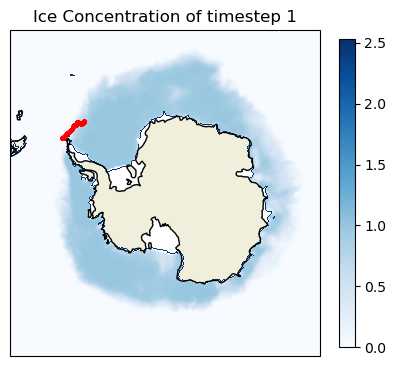

In [22]:


# set figure size
plt.figure(figsize=(5,5))
# set the map projection and associated boundaries
ax = plt.axes(projection = polar_crs)
ax.set_extent([-3950000.0, 3950000.0, -3950000.0, 4350000.0], polar_crs) # Valid Range: xgrid [-3950000.0, 3950000.0] & ygrid [-3950000.0, 4350000.0]
ax.coastlines()
ax.add_feature(cfeature.LAND)

# set the data crs using 'transform'
# set the data crs as described in the netcdf metadata
cs = ax.pcolormesh(ds['xgrid'], ds['ygrid'], sic[0],
                   cmap=plt.cm.Blues,  transform= polar_crs) #transform default is basemap specs
plt.colorbar(cs, ax=ax, location='right', shrink =0.8)

# Add the penguin tracks to the map
scatter = plt.scatter(
    y=adpe24["ygrid"],
    x=adpe24["xgrid"],
    color="red",
    s=3,
    alpha=1,
    transform=polar_crs
)

ax.set_title('Ice Concentration of timestep 1')

### **Bird ID ADPE24 (Female)**

TODO
* Extract Sea Ice Concentration Data based on Date and Location
* Map the data 